In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,Dropout
from tensorflow.keras import Model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import cv2

In [4]:
train_data_path = '/content/drive/MyDrive/7-7 dataset'

width = height = 224

idg = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    brightness_range = (0.6,1.2),
    zoom_range = 0.1,
    shear_range = 0.3,
    rotation_range = 15,
    validation_split = 0.2
)

train_data = idg.flow_from_directory(
    train_data_path,
    target_size = (width,height),
    subset = "training"
)
val_data = idg.flow_from_directory(
    train_data_path,
    target_size = (width,height),
    subset = "validation",
    shuffle=False
)

Found 1090 images belonging to 14 classes.
Found 268 images belonging to 14 classes.


In [5]:
base_model = tf.keras.applications.InceptionV3(
    include_top=False,
    weights = 'imagenet',
    input_shape=(width,height,3),
    pooling = 'avg'
)

model = tf.keras.models.Sequential([
        base_model,
        Dropout(0.3),
        Flatten(),
        Dense(128,activation='relu'),
        Dense(256,activation='relu'),
        Dense(14,activation='softmax')

])

87910968/87910968 [==============================] - 0s 0us/step


In [6]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [7]:
model.fit(train_data,validation_data=val_data,epochs=15)

Epoch 1/15
35/35 [==============================] - 541s 14s/step - loss: 2.5631 - accuracy: 0.1624 - val_loss: 2.4999 - val_accuracy: 0.2015
Epoch 2/15
35/35 [==============================] - 30s 852ms/step - loss: 2.0862 - accuracy: 0.4514 - val_loss: 1.8446 - val_accuracy: 0.4925
Epoch 3/15
35/35 [==============================] - 30s 855ms/step - loss: 1.3796 - accuracy: 0.6899 - val_loss: 1.2694 - val_accuracy: 0.6269
Epoch 4/15
35/35 [==============================] - 31s 870ms/step - loss: 0.8400 - accuracy: 0.8211 - val_loss: 0.8253 - val_accuracy: 0.7201
Epoch 5/15
35/35 [==============================] - 30s 860ms/step - loss: 0.5107 - accuracy: 0.8844 - val_loss: 0.6347 - val_accuracy: 0.8060
Epoch 6/15
35/35 [==============================] - 30s 852ms/step - loss: 0.3421 - accuracy: 0.9229 - val_loss: 0.3727 - val_accuracy: 0.8918
Epoch 7/15
35/35 [==============================] - 30s 852ms/step - loss: 0.2133 - accuracy: 0.9532 - val_loss: 0.3451 - val_accuracy: 0.8918


In [ ]:
model.save('face_recognition.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 8s 726ms/step


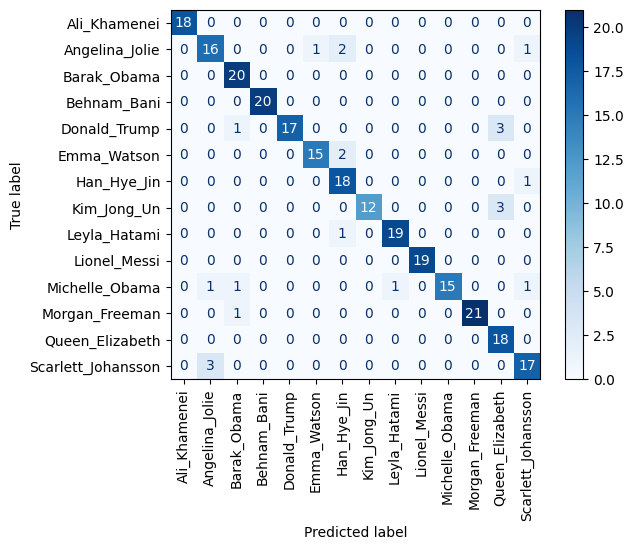

In [8]:
target_names = ['Ali_Khamenei', 'Angelina_Jolie', 'Barak_Obama', 'Behnam_Bani', 'Donald_Trump',
                 'Emma_Watson', 'Han_Hye_Jin', 'Kim_Jong_Un', 'Leyla_Hatami',
                 'Lionel_Messi', 'Michelle_Obama', 'Morgan_Freeman', 'Queen_Elizabeth', 'Scarlett_Johansson']

Y_pred = model.predict(val_data)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(val_data.classes, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
font={'size':'10'}
plt.rc('font',**font)
disp.plot(cmap='Blues',xticks_rotation=90)
plt.show()


##Inference

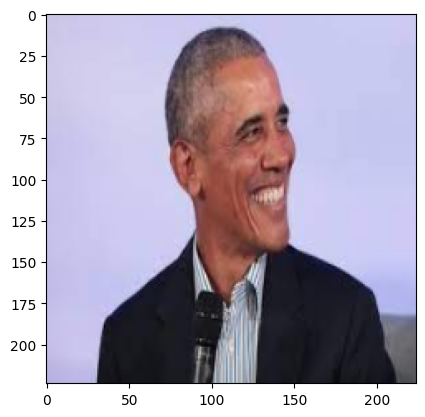

In [24]:
image = cv2.imread('/content/barak_obama.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img = cv2.resize(image ,(width,height))
plt.imshow(img)


In [25]:

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img = img / 255
img = img.reshape(1,width,height,3)

result = np.argmax(model.predict(img))
target_names[result]

1/1 [==============================] - 0s 55ms/step


'Barak_Obama'